# Human Activity Recognition (HAR) explore

In [1]:
# Imports
import numpy as np
import os
from utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
%matplotlib inline

In [2]:
% ls ../../datasets/fNIRs_data/
# % find ../../datasets/fNIRs_data/ | grep fNIR_data

drive-download-20180508T223604Z-001.zip  P16-4-18-2018/
drive-download-20180508T224055Z-001.zip  P17-4-18-2018/
drive-download-20180508T225152Z-001.zip  P2-4-5-2018/
drive-download-20180508T225643Z-001.zip  P3_4_11_2018/
P10-4-16-2018/                           P4-4-12-2018/
P11-4-17-2018/                           P5-4-14-2018/
P12-4-17-2018/                           P6-4-15-2018/
P13-4-17-2018/                           P7-4-16-2018/
P14-4-18-2018/                           P8-4-16-2018/
P1_4_4_2018/                             P9-4-16-2018/
P1_4_4_2018-20180508T223342Z-001.zip     paths.txt
P15-4-18-2018/


In [3]:
# # % ls ../../../arasdar/datasets/har-data/train/Inertial_Signals/
# % ls ../../datasets/har/har-data/train/Inertial_Signals/ 

In [4]:
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

In [11]:
allpaths = find_all(name='fNIR_data.txt', path='/home/arasdar/datasets/fNIRs_data/')

In [12]:
allpaths[0], allpaths[-1], allpaths[23]

('/home/arasdar/datasets/fNIRs_data/P2-4-5-2018/fNIR_data.txt',
 '/home/arasdar/datasets/fNIRs_data/P1_4_4_2018/fNIR_data.txt',
 '/home/arasdar/datasets/fNIRs_data/P11-4-17-2018/Left hand/fNIR_data.txt')

In [13]:
# df: data frame object
df = []
for each_idx in range(len(allpaths)):
    df.append(pd.read_csv(filepath_or_buffer=allpaths[each_idx], names=['time', 'sample', 
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel']))

/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [14]:
for each in range(len(df)):
#     print(df[each]['sample'][2])
    df[each]['sample'][1:] = df[each]['sample'][1:].astype(str).str[2:]
    df[each]['channel.39'][1:] = df[each]['channel.39'][1:].astype(str).str[1:-1]    
# # df[23], allpaths[23], 
# #  '/home/arasdar/datasets/fNIRs_data/P11-4-17-2018/Right Leg/fNIR_data.txt')
# pd.read_csv(filepath_or_buffer=allpaths[23], names=['time', 'sample', 
#                        'channel', 'channel', 'channel', 'channel', 'channel',
#                        'channel', 'channel', 'channel', 'channel', 'channel',
#                        'channel', 'channel', 'channel', 'channel', 'channel',
#                        'channel', 'channel', 'channel', 'channel', 'channel',
#                        'channel', 'channel', 'channel', 'channel', 'channel',
#                        'channel', 'channel', 'channel', 'channel', 'channel',
#                        'channel', 'channel', 'channel', 'channel', 'channel',
#                        'channel', 'channel', 'channel', 'channel', 'channel']).head(), allpaths[23]

/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
# df['channel.39'][1:] = df['channel.39'][1:].astype(str).str[1:-1]

In [27]:
for each in range(len(df)):
    print(df[each].head())
# df['sample']

                     time sample   channel  channel.1  channel.2  channel.3  \
0  Start time: 111933.504    NaN       NaN        NaN        NaN        NaN   
1              111933.573  200.0  0.311558   0.055695   0.089458   0.094693   
2              111933.701  201.0  0.309922   0.041069   0.086965   0.091637   
3              111933.830  202.0  0.322296   0.046739   0.102861   0.100891   
4              111933.957  203.0  0.307481   0.056330   0.097120   0.110064   

   channel.4  channel.5  channel.6  channel.7         ...           \
0        NaN        NaN        NaN        NaN         ...            
1   0.521340   0.187652   0.062816   0.413603         ...            
2   0.513974   0.187700   0.053470   0.414720         ...            
3   0.516168   0.187109   0.046066   0.405249         ...            
4   0.523805   0.190584   0.059268   0.409198         ...            

   channel.30  channel.31  channel.32  channel.33  channel.34  channel.35  \
0         NaN         NaN  

                     time sample   channel  channel.1  channel.2  channel.3  \
0  Start time: 151128.806    NaN       NaN        NaN        NaN        NaN   
1              151128.894   87.0  0.040659   0.025566   0.062218   0.447523   
2              151129.022   88.0  0.039588   0.029759   0.087561   0.469888   
3              151129.150   89.0  0.038111   0.026088   0.087724   0.441741   
4              151129.278   90.0  0.038736   0.026574   0.074461   0.451638   

   channel.4  channel.5  channel.6  channel.7         ...           \
0        NaN        NaN        NaN        NaN         ...            
1   0.107515   0.201094   0.062624   0.321298         ...            
2   0.091829   0.201698   0.064785   0.338974         ...            
3   0.107383   0.203169   0.079802   0.330116         ...            
4   0.103679   0.201766   0.071358   0.327017         ...            

   channel.30  channel.31  channel.32  channel.33  channel.34  channel.35  \
0         NaN         NaN  

                     time sample   channel  channel.1  channel.2  channel.3  \
0  Start time: 173155.866    NaN       NaN        NaN        NaN        NaN   
1              173155.952  168.0  0.797728   0.421622   0.199836   0.085074   
2              173156.080  169.0  0.793012   0.418947   0.197406   0.084782   
3              173156.206  170.0  0.792585   0.419749   0.197587   0.084901   
4              173156.335  171.0  0.794167   0.419126   0.195937   0.084802   

   channel.4  channel.5  channel.6  channel.7         ...          channel.30  \
0        NaN        NaN        NaN        NaN         ...                 NaN   
1   0.747039   0.420097   0.363549   0.147493         ...            0.867762   
2   0.743307   0.419240   0.362203   0.146919         ...            0.864313   
3   0.744209   0.419079   0.364194   0.147121         ...            0.863913   
4   0.747709   0.419655   0.365896   0.147902         ...            0.867719   

   channel.31  channel.32  channel.33 

In [28]:
matrices = []
for each in range(len(df)):
    matrices.append(df[each][1:].as_matrix().astype(float))

In [64]:
data = []
for mat in matrices:
    print(mat[:, 2:].shape, mat[:, 2:].dtype)
    data.append(mat[:, 2:])

(8387, 40) float64
(1195, 40) float64
(2383, 40) float64
(1229, 40) float64
(2374, 40) float64
(1196, 40) float64
(1202, 40) float64
(2404, 40) float64
(1195, 40) float64
(2379, 40) float64
(1241, 40) float64
(1229, 40) float64
(2386, 40) float64
(1223, 40) float64
(2378, 40) float64
(1226, 40) float64
(1201, 40) float64
(2371, 40) float64
(1209, 40) float64
(2377, 40) float64
(1221, 40) float64
(8261, 40) float64
(1200, 40) float64
(2388, 40) float64
(1243, 40) float64
(2387, 40) float64
(8275, 40) float64
(8358, 40) float64
(1195, 40) float64
(2372, 40) float64
(1201, 40) float64
(2385, 40) float64
(1228, 40) float64
(8276, 40) float64
(1222, 40) float64
(2372, 40) float64
(1219, 40) float64
(2371, 40) float64
(1221, 40) float64
(8414, 40) float64
(8321, 40) float64
(8278, 40) float64
(8258, 40) float64
(717, 40) float64


In [65]:
# ToDO
# Standardizing the dataset or normalizing the dataset
# The question here is: if we should normalize/standardize every single batch alone or
# normalize them all together?
# X = np.array(data)
# X.shape, X.dtype
# X = np.zeros_like(data[0])
# X.shape, X.dtype
X = data[0] # initialize the stack
X.shape, X.dtype
for each in range(1, len(data), 1): # start, stop, step
    X = np.vstack(tup=(X, data[each]))

In [76]:
X.shape, X.dtype, X[300, 10], data[0][300, 10], 
t, n = 8387+1195+2383 -1, 40-1
X[t, n], data[3-1][2383 -1][n]

(0.7594267725944519, 0.7594267725944519)

In [79]:
Xnorm = (X - X.mean(axis=0))/ X.std(axis=0)
Xnorm.shape, Xnorm.dtype, Xnorm.mean(axis=0), Xnorm.std(axis=0)

((133168, 40),
 dtype('float64'),
 array([ 3.24409756e-17, -1.56228909e-16, -1.70741977e-17,  1.70741977e-17,
        -8.19561488e-17,  1.05860026e-16,  6.82967907e-17, -7.51264697e-17,
        -5.80522721e-17, -5.20763029e-17,  8.19561488e-17,  2.73187163e-17,
        -1.53667779e-17,  8.70784081e-17, -1.62204878e-16, -1.66473427e-16,
        -8.53709883e-17, -1.17811964e-16,  5.80522721e-17, -1.09274865e-16,
         1.51960359e-16, -2.11293196e-17, -3.04134146e-17,  6.82967907e-18,
         1.22934223e-16,  1.28056482e-17, -2.39038767e-17, -5.46374325e-17,
         4.69540436e-17, -3.58558151e-17, -7.85413093e-17, -3.41483953e-17,
         4.95151732e-17,  6.14671116e-17, -2.73187163e-17, -2.04890372e-17,
         9.90303464e-17, -2.56112965e-17,  7.25653401e-17,  8.87858278e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [106]:
sr = 0.129 # 111933.573-111933.504 is the difference between each two samples or sampling rate
each_trial=30 # 30seconds=20sec+10sec
# num_samples_per_trial
# each trial or epoch based on BCI course
# height or window size
30/0.129, np.floor(30/0.129), np.ceil(30/0.129)
# The size of each image for convnet will be 233x40x1 which is equal to the format NHWC, txn or NWC
# NWC is for signals since all the channels are projected the same as all channels in an image as well.
# In each convolutionn for image or signals the channels are all included for filtering
# Image or video might be part of this
# Image is NHWC or NCHW
# Signal is NWC or NCW
# N is the number of trials/epochs/windows
# C is the number of channels is 40 in this experiment: 20 for hemoglobin with o2 and 20 for hemoglobin with co2
# W is the window width size or signal window size which is 233
width = np.ceil(30/0.129)
# This is the number of minibatches per file
num_mb = mat.shape[0] - width +1
# num_mb # number of minibatches
# totla number of all the windows with the overlapping windows of 1 sample
num_mb, width
# len(allpaths), allpaths[44], num_mb*len(allpaths)

(485.0, 233.0)

In [107]:
width=250 # this is the window width or mb_size
Xnt, Xnv = [], [] # Xnt: data normal train; Xnv: data normal validation
Xnt.append(Xnorm[:data[0].shape[0]-width])
Xnv.append(Xnorm[data[0].shape[0]-width:data[0].shape[0]])
Xnt[0].shape, Xnv[0].shape, Xnorm.shape, data[0].shape[0], width

((8137, 40), (250, 40), (133168, 40), 8387, 250)

In [108]:
l = data[0].shape[0]
h = data[0].shape[0]+data[1].shape[0]
Xnt.append(Xnorm[l:h-width])
Xnv.append(Xnorm[h-width:h])
Xnt[1].shape, Xnv[1].shape, data[1].shape, l, h, width

((945, 40), (250, 40), (1195, 40), 8387, 9582, 250)

In [109]:
l = h
h = l+data[2].shape[0]
Xnt.append(Xnorm[l:h-width])
Xnv.append(Xnorm[h-width:h])
Xnt[2].shape, Xnv[2].shape, data[2].shape, l, h, width

((2133, 40), (250, 40), (2383, 40), 9582, 11965, 250)

In [110]:
idx=3
l = h
h = l+data[idx].shape[0]
Xnt.append(Xnorm[l:h-width])
Xnv.append(Xnorm[h-width:h])
Xnt[idx].shape, Xnv[idx].shape, data[idx].shape, l, h, width

((979, 40), (250, 40), (1229, 40), 11965, 13194, 250)

In [111]:
idx=4
l = h
h = l+data[idx].shape[0]
Xnt.append(Xnorm[l:h-width])
Xnv.append(Xnorm[h-width:h])
Xnt[idx].shape, Xnv[idx].shape, data[idx].shape, l, h, width

((2124, 40), (250, 40), (2374, 40), 13194, 15568, 250)

In [117]:
l, h, Xnt, Xnv = 0, 0, [], []
for idx in range(0, len(data), 1): # start, stop, step
    l = h
    h += data[idx].shape[0]
    Xnt.append(Xnorm[l:h-width])
    Xnv.append(Xnorm[h-width:h])
    print(Xnt[idx].shape, Xnv[idx].shape, data[idx].shape, width)    
    print(Xnt[idx].dtype, Xnv[idx].dtype, data[idx].dtype, width)

(8137, 40) (250, 40) (8387, 40) 250
float64 float64 float64 250
(945, 40) (250, 40) (1195, 40) 250
float64 float64 float64 250
(2133, 40) (250, 40) (2383, 40) 250
float64 float64 float64 250
(979, 40) (250, 40) (1229, 40) 250
float64 float64 float64 250
(2124, 40) (250, 40) (2374, 40) 250
float64 float64 float64 250
(946, 40) (250, 40) (1196, 40) 250
float64 float64 float64 250
(952, 40) (250, 40) (1202, 40) 250
float64 float64 float64 250
(2154, 40) (250, 40) (2404, 40) 250
float64 float64 float64 250
(945, 40) (250, 40) (1195, 40) 250
float64 float64 float64 250
(2129, 40) (250, 40) (2379, 40) 250
float64 float64 float64 250
(991, 40) (250, 40) (1241, 40) 250
float64 float64 float64 250
(979, 40) (250, 40) (1229, 40) 250
float64 float64 float64 250
(2136, 40) (250, 40) (2386, 40) 250
float64 float64 float64 250
(973, 40) (250, 40) (1223, 40) 250
float64 float64 float64 250
(2128, 40) (250, 40) (2378, 40) 250
float64 float64 float64 250
(976, 40) (250, 40) (1226, 40) 250
float64 float

In [37]:
# data[0].shape, data[0].dtype
#  This part is for extracting the minibatches from the data and every single batch of data
# In this part we extract train, valid and test
# first of all we extract test and train completely
# Then, we divide the training set into train and validation datasets
# It is important to know that since this is not a classification task,
# we donot need to have valid and test
# Only to avoid overfitting, we devide the entire dataset into train and validation/test
# test and validation are the same but in fact, we don't have test dataset.
# Let's keep that last trial/epoch for activity of each batch as the validation set
# It is calculated to be 233 but for more safety and assurance we'll keep 250 of the last batch as valid
Xnt, Xnv = Xn[] 
for each in range(len(data)):
    # Xtrain is the training set which is all the databatch except the last 250
    Xt.append(X[:-250])
    # Xvalid is the validation dataset which is the last 250 samples/observation
    Xv.append(X[-250:])

In [4]:
X_train, labels_train, list_ch_train = read_data(data_path="../../../arasdar/datasets/har/har-data/", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path="../../../arasdar/datasets/har/har-data/", split="test") # test

assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [5]:
print ("Training data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_train.shape[0],
                                                                             X_train.shape[1],
                                                                             X_train.shape[2]))
print ("Test data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_test.shape[0],
                                                                         X_test.shape[1],
                                                                         X_test.shape[2]))

Training data shape: N = 7352, steps = 128, channels = 9
Test data shape: N = 2947, steps = 128, channels = 9


In [6]:
X_train.shape, X_train.dtype, labels_train.shape, labels_train.dtype

((7352, 128, 9), dtype('float64'), (7352,), dtype('int64'))

In [6]:
labels_train.max(), labels_test.max()

(6, 6)

In [7]:
(np.mean(labels_train==0), np.mean(labels_train==1), np.mean(labels_train==2),
np.mean(labels_train==3), np.mean(labels_train==4), np.mean(labels_train==5), np.mean(labels_train==6), 
np.mean(labels_train==7))

(0.0,
 0.16675734494015235,
 0.1459466811751904,
 0.13411316648531013,
 0.1749183895538629,
 0.1868879216539717,
 0.1913764961915125,
 0.0)

In [8]:
(np.mean(labels_test==0), np.mean(labels_test==1), np.mean(labels_test==2),
np.mean(labels_test==3), np.mean(labels_test==4), np.mean(labels_test==5), np.mean(labels_test==6), 
np.mean(labels_test==7))

(0.0,
 0.168306752629793,
 0.15982354937224297,
 0.14251781472684086,
 0.166610111978283,
 0.18052256532066507,
 0.18221920597217509,
 0.0)

In [9]:
# Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

In [10]:
all_data.shape, X_train.shape, X_test.shape, means_.shape, stds_.shape

((10299, 128, 9), (7352, 128, 9), (2947, 128, 9), (128, 9), (128, 9))

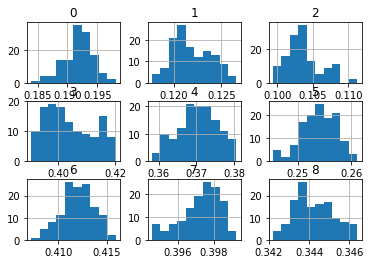

In [11]:
df_std.hist()
plt.show()

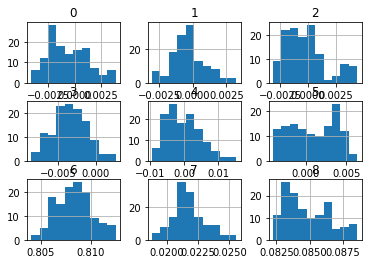

In [12]:
df_mean.hist()
plt.show()

Some channels have mean values near 1, most close to 0. Let's standardize them all

In [13]:
X_train, X_test = standardize(X_train, X_test)

In [14]:
# Check Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[1],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[1],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=0)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=0)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

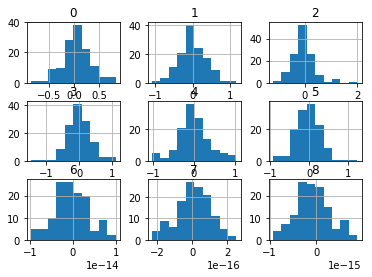

In [15]:
df_mean.hist()
plt.show()

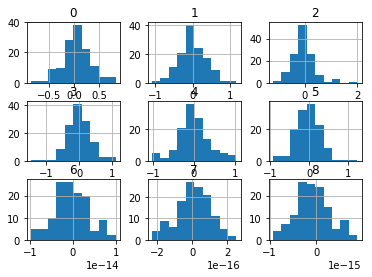

In [16]:
df_mean.hist()
plt.show()

In [17]:
df_std.shape, df_std.dtypes

((128, 9), 0    float64
 1    float64
 2    float64
 3    float64
 4    float64
 5    float64
 6    float64
 7    float64
 8    float64
 dtype: object)

In [18]:
X_data = np.concatenate((X_train, X_test))

In [19]:
X_data.shape, X_data.dtype, X_train.shape, X_test.shape, X_train.dtype, X_test.dtype

((10299, 128, 9),
 dtype('float64'),
 (7352, 128, 9),
 (2947, 128, 9),
 dtype('float64'),
 dtype('float64'))

In [20]:
X_data_mean = X_data.mean(axis=0, dtype=float)

In [46]:
X_data_mean.shape, X_data_mean.dtype

((128, 9), dtype('float64'))

In [47]:
X_data_mean_DataFrame = pd.DataFrame(data=X_data_mean)

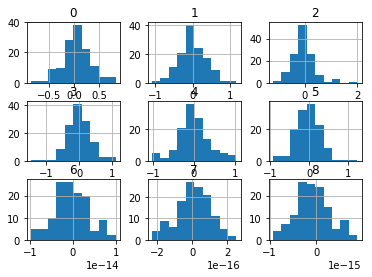

In [48]:
X_data_mean_DataFrame.hist()
plt.show()